In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe {font-size:12px;}
</style>
"""))

# 데이터셋을 라이브러리에서 가져오기. data/ 폴더안에서도 확인 가능

In [10]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Dropout, Input, LeakyReLU, ELU, ReLU
from matplotlib import pyplot as plt

In [3]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [6]:
print('타겟 :', data[1,0])
# print('이미지(784pixel=28*28) :', data[1, 1:])
image = data[1, 1:].reshape(28,28)
image.shape

타겟 : 0.0


(28, 28)

In [8]:
for row in image:
    for pixel in row:
        print("{:3.0f}".format(pixel), end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0 

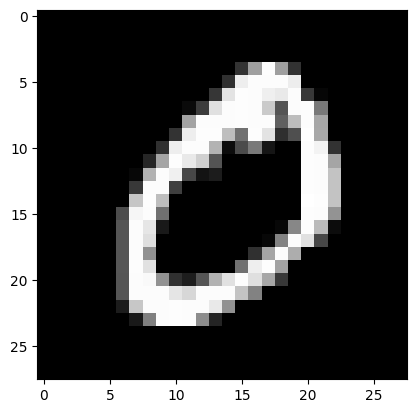

In [12]:
plt.imshow(image, cmap='gray')

In [13]:
%pip install opencv-python==4.8.1.78

   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ------ --------------------------------- 6.6/38.1 MB 50.3 MB/s eta 0:00:01
   ---------------- ----------------------- 16.0/38.1 MB 43.8 MB/s eta 0:00:01
   ------------------------- -------------- 24.1/38.1 MB 42.4 MB/s eta 0:00:01
   ------------------------------------- -- 35.9/38.1 MB 46.6 MB/s eta 0:00:01
   ---------------------------------------- 38.1/38.1 MB 43.2 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


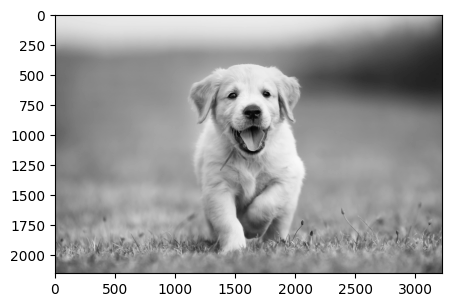

In [16]:
# 칼라사진 -> 흑백모드로 넘파이 배열로 일기
import cv2
# 사진이미지를 흑백포맷으로 넘파이 배열로 읽어오기
image_gray = cv2.imread('data/sample.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5,5))
plt.imshow(image_gray, cmap='gray')

# 1. 데이터 생성 및 전처리 

In [45]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

7


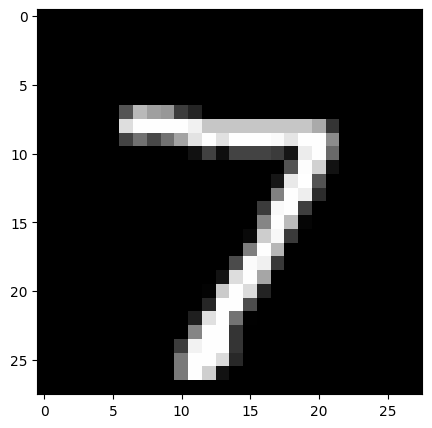

In [19]:
print(y_test[0])
plt.figure(figsize=(5,5))
plt.imshow(X_test[0], cmap='gray')
plt.show()
# for row in X_test[0]:
#     for pixel in row:
#         print("{:3.0f}".format(pixel), end=' ')
#     print()

In [46]:
# Train 데이터 6만개 => Train(5만개) + Val(1만개) 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [21]:
print('학습셋 :', X_train.shape, y_train.shape)
print('검증셋 :', X_val.shape, y_val.shape)
print('시험셋 :', X_test.shape, y_test.shape)

학습셋 : (50000, 28, 28) (50000,)
검증셋 : (10000, 28, 28) (10000,)
시험셋 : (10000, 28, 28) (10000,)


In [47]:
# 입력(독립) 변수 (n,28,28) -> (n,28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X = X_val.reshape(-1, 28*28).astype('float32')/255.0
test_X = X_test.reshape(-1, 28*28).astype('float32')/255.0

train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [37]:
# 분류분석을 위한 타겟변수의 원핫인코딩
# to_categorical(y_train)
train_Y = to_categorical(y_train)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
train_Y.shape, val_Y.shape, test_Y.shape

((50000, 10), (10000, 10), (10000, 10))

In [38]:
# Train 5만 -> 700개, Val 1만 ->300개 (목적: 수업시간 중 fit 시간 절약)
train_idx = np.random.choice(50000,700) # 0~10미만의 수 3개 뽑기
val_idx = np.random.choice(10000, 300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X = val_X[val_idx]
val_Y = val_Y[val_idx]

In [39]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((700, 784), (700, 10), (300, 784), (300, 10), (10000, 784), (10000, 10))

In [40]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2))
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과 (기본값: 0.3)
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [41]:
model.compile(loss='categorical_crossentropy', #sparse_categorical_crossentropy : 원핫인코딩하지 않았을경우
             optimizer='adam',
             metrics=['accuracy'])

# 4. 모델학습

In [42]:
%%time
hist = model.fit(train_X, train_Y, #학습셋
                epochs=200, batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 26ms/step - loss: 2.2960 - accuracy: 0.1500 - val_loss: 2.2667 - val_accuracy: 0.1333
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 2.2665 - accuracy: 0.1714 - val_loss: 2.2462 - val_accuracy: 0.1500
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 2.2465 - accuracy: 0.1771 - val_loss: 2.2183 - val_accuracy: 0.1333
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 2.2136 - accuracy: 0.1771 - val_loss: 2.1934 - val_accuracy: 0.1233
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 2.1840 - accuracy: 0.1700 - val_loss: 2.1715 - val_accuracy: 0.1633
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 2.1584 - accuracy: 0.2086 - val_loss: 2.1492 - val_accuracy: 0.1867
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 2.1345 - accuracy: 0.2286 - val_loss: 2.1295 - val_accuracy: 0.1933
Epoch 8/200
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 1.3169 - accuracy: 0.5000 - val_loss: 1.4777 - val_accuracy: 0.4000
Epoch 118/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3134 - accuracy: 0.5014 - val_loss: 1.4770 - val_accuracy: 0.4000
Epoch 119/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3097 - accuracy: 0.5014 - val_loss: 1.4734 - val_accuracy: 0.4067
Epoch 120/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3064 - accuracy: 0.5014 - val_loss: 1.4730 - val_accuracy: 0.4067
Epoch 121/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3029 - accuracy: 0.5043 - val_loss: 1.4714 - val_accuracy: 0.4000
Epoch 122/200
7/7 [==============================] - 0s 5ms/step - loss: 1.2994 - accuracy: 0.5043 - val_loss: 1.4700 - val_accuracy: 0.4100
Epoch 123/200
7/7 [==============================] - 0s 5ms/step - loss: 1.2960 - accuracy: 0.5029 - val_loss: 1.4670 - val_accuracy: 0.4100
Epoch 124/200
7/7 [========

# 5. 모델 평가하기

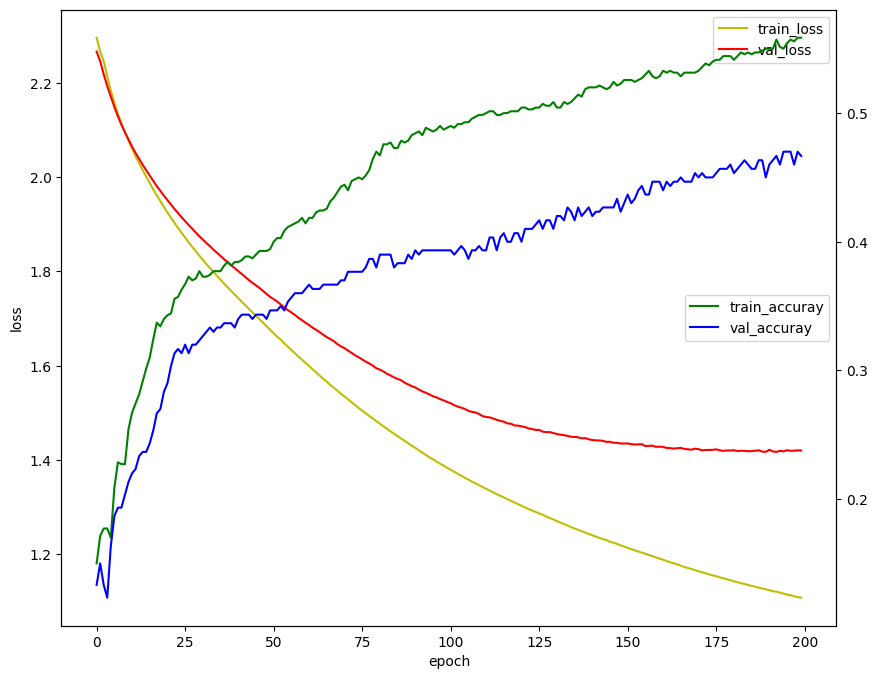

In [43]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x 축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuray')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuray')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')
loss_ax.legend(loc='upper right')
acc_ax.legend(loc='center right')
plt.show()

In [44]:
# 모델평가
loss_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_metrics[0])
print('accuracy :', loss_metrics[1])

loss : 1.4387165307998657
accuracy : 0.4645000100135803


# 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 모델 수정 (레이어추가, units수 증가)
- 과적합 방지: validation data 추가, 활성화함수(relu 계열, tanh 계열), Dropout 레이어
- epoch 조정
- optimizer 변경 (거의 효과는 없다)

In [48]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [49]:
# Train 데이터 6만개 => Train(5만개) + Val(1만개) 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [50]:
# 입력(독립) 변수 (n,28,28) -> (n,28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X = X_val.reshape(-1, 28*28).astype('float32')/255.0
test_X = X_test.reshape(-1, 28*28).astype('float32')/255.0

train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [51]:
# 분류분석을 위한 타겟변수의 원핫인코딩
# to_categorical(y_train)
train_Y = to_categorical(y_train)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
train_Y.shape, val_Y.shape, test_Y.shape

((50000, 10), (10000, 10), (10000, 10))

In [62]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과 (기본값: 0.3)
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               65664     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)               

In [63]:
model.compile(loss='categorical_crossentropy', #sparse_categorical_crossentropy : 원핫인코딩하지 않았을경우
             optimizer='adam',
             metrics=['accuracy'])

In [64]:
%%time
hist = model.fit(train_X, train_Y, #학습셋
                epochs=20, batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)

Epoch 1/20
500/500 [==============================] - 5s 9ms/step - loss: 0.4150 - accuracy: 0.8792 - val_loss: 0.1602 - val_accuracy: 0.9552
Epoch 2/20
500/500 [==============================] - 4s 9ms/step - loss: 0.1696 - accuracy: 0.9554 - val_loss: 0.1027 - val_accuracy: 0.9715
Epoch 3/20
500/500 [==============================] - 4s 9ms/step - loss: 0.1251 - accuracy: 0.9662 - val_loss: 0.1015 - val_accuracy: 0.9735
Epoch 4/20
500/500 [==============================] - 4s 9ms/step - loss: 0.0992 - accuracy: 0.9735 - val_loss: 0.0905 - val_accuracy: 0.9761
Epoch 5/20
500/500 [==============================] - 4s 9ms/step - loss: 0.0846 - accuracy: 0.9765 - val_loss: 0.1021 - val_accuracy: 0.9715
Epoch 6/20
500/500 [==============================] - 4s 9ms/step - loss: 0.0753 - accuracy: 0.9799 - val_loss: 0.0777 - val_accuracy: 0.9795
Epoch 7/20
500/500 [==============================] - 4s 9ms/step - loss: 0.0647 - accuracy: 0.9818 - val_loss: 0.0905 - val_accuracy: 0.9777
Epoch 

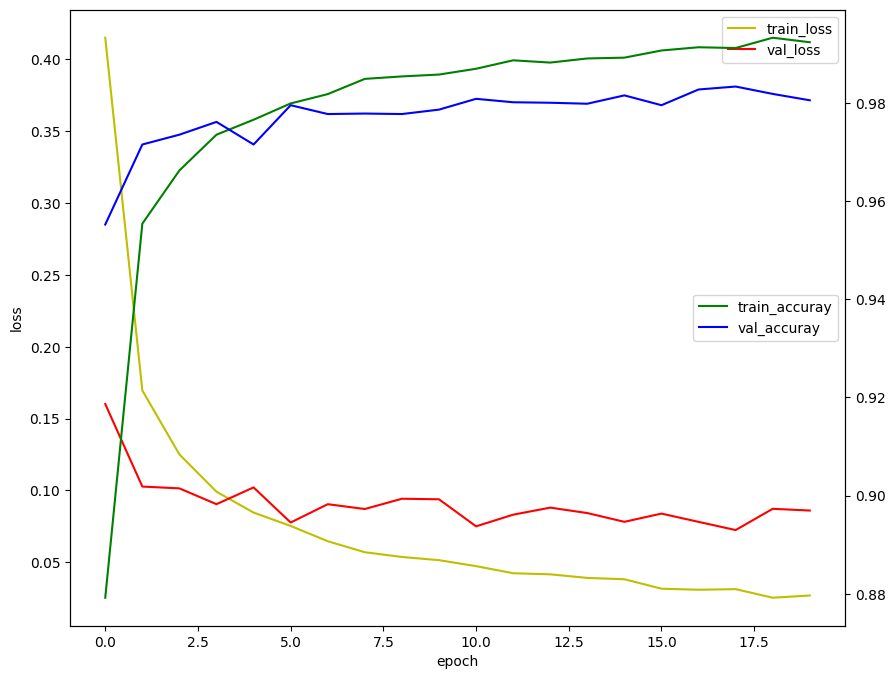

In [66]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x 축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuray')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuray')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')
loss_ax.legend(loc='upper right')
acc_ax.legend(loc='center right')
plt.show()

In [76]:
score = model.evaluate(test_X, test_Y)
score[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.0866 - accuracy: 0.9807


0.9807000160217285

In [69]:
#교차표
np.all(test_Y.argmax(axis=1) == y_test) #실제값(y_test)

True

In [74]:
y_hat = model.predict(test_X).argmax(axis=1) #예측값

313/313 [==============================] - 1s 3ms/step


In [75]:
pd.crosstab(y_test, y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,1,2,3,4,5,6,7,8,9
실제값,,,,,,,,,,
0,973,1,1,1,1,1,0,1,1,0
1,0,1128,4,0,0,0,1,0,2,0
2,1,1,1021,0,2,0,0,5,2,0
3,1,0,17,975,1,2,0,7,3,4
4,0,1,3,0,966,0,4,3,2,3
5,4,0,1,6,1,868,4,1,4,3
6,7,3,1,0,4,2,940,0,1,0
7,1,6,6,0,1,0,0,1009,2,3
8,4,1,6,3,4,0,4,5,943,4


In [77]:
# 틀린 갯수
10000-10000*score[1]

192.99983978271484

# 콜백함수1 : 로그출력

In [78]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [86]:
%%time

#특정 에포크마다 로그출력하도록 제한
class CustomHistory(Callback):
    def __init__(self): # 생성자함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        '1 epoch마다 자동 실행되는 함수'
        self.epoch += 1
        if self.epoch%10 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.format(
                self.epoch, logs.get('loss'), logs.get('accuracy', '-'),
                logs.get('val_loss', '-'), logs.get('val_accuracy', '-')
            ))
custom_history = CutomHistory()

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Train 데이터 6만개 => Train(5만개) + Val(1만개) 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n,28,28) -> (n,28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X = X_val.reshape(-1, 28*28).astype('float32')/255.0
test_X = X_test.reshape(-1, 28*28).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# to_categorical(y_train)
train_Y = to_categorical(y_train)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
# Train 5만 -> 700개, Val 1만 ->300개 (목적: 수업시간 중 fit 시간 절약)
train_idx = np.random.choice(50000,700) # 0~10미만의 수 3개 뽑기
val_idx = np.random.choice(10000, 300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X = val_X[val_idx]
val_Y = val_Y[val_idx]

model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', #sparse_categorical_crossentropy : 원핫인코딩하지 않았을경우
             optimizer='adam',
             metrics=['accuracy'])
hist = model.fit(train_X, train_Y, #학습셋
                epochs=50, batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0,
                callbacks=[custom_history]) #콜백함수

epoch:10, loss:2.060682535171509, acc:0.2442857176065445, val_loss:2.078906297683716, val_acc:0.1966666728258133
epoch:20, loss:1.8886431455612183, acc:0.28999999165534973, val_loss:1.9358203411102295, val_acc:0.2633333206176758
epoch:30, loss:1.7631503343582153, acc:0.37714284658432007, val_loss:1.834578037261963, val_acc:0.3100000023841858
epoch:40, loss:1.6641181707382202, acc:0.40714284777641296, val_loss:1.7592805624008179, val_acc:0.3233333230018616
epoch:50, loss:1.583542823791504, acc:0.4285714328289032, val_loss:1.7029298543930054, val_acc:0.3266666531562805
CPU times: total: 3.2 s
Wall time: 2.52 s


# 콜백함수2 : EarlyStopping
- val_loss 값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuracy 값이 감소하면 지정한 epoch를 수행하지 않고 조기 종료

In [89]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', #sparse_categorical_crossentropy : 원핫인코딩하지 않았을경우
             optimizer='adam',
             metrics=['accuracy'])
#monitor 기준으로 patience번 이상 안 좋은 데이터가 나올시 조기 종료
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

hist = model.fit(train_X, train_Y, #학습셋
                epochs=50, batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[early_stopping]) #콜백함수

Epoch 1/50
7/7 [==============================] - 0s 26ms/step - loss: 2.3206 - accuracy: 0.0771 - val_loss: 2.3013 - val_accuracy: 0.0700
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 2.2918 - accuracy: 0.1186 - val_loss: 2.2873 - val_accuracy: 0.1200
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 2.2702 - accuracy: 0.1000 - val_loss: 2.2693 - val_accuracy: 0.0933
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 2.2418 - accuracy: 0.1143 - val_loss: 2.2307 - val_accuracy: 0.1400
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 2.1945 - accuracy: 0.1314 - val_loss: 2.1676 - val_accuracy: 0.1700
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 2.1516 - accuracy: 0.1529 - val_loss: 2.1278 - val_accuracy: 0.1733
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 2.1145 - accuracy: 0.1629 - val_loss: 2.1009 - val_accuracy: 0.1800
Epoch 8/50
7/7 [=================

# 콜백함수 3 : ModelCheckpoint
- 모델의 정확도가 내려가면 자동 저장하는 콜백함수

In [92]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', #sparse_categorical_crossentropy : 원핫인코딩하지 않았을경우
             optimizer='adam',
             metrics=['accuracy'])

import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder):
    os.makedirs(model_save_folder)
file = model_save_folder+'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'
model_checkpoint = ModelCheckpoint(filepath=file, 
                                   monitor='val_accuracy', 
                                   save_best_only=True, 
                                   mode='max', #값이 클수록 저장
                                   verbose=1)

hist = model.fit(train_X, train_Y, #학습셋
                epochs=200, batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[model_checkpoint]) #콜백함수

Epoch 1/200
1/7 [===>..........................] - ETA: 1s - loss: 2.2979 - accuracy: 0.1200
Epoch 1: val_accuracy improved from -inf to 0.11667, saving model to ./model08\mnist-001-val0.1167.h5
7/7 [==============================] - 0s 26ms/step - loss: 2.2786 - accuracy: 0.1471 - val_loss: 2.2567 - val_accuracy: 0.1167
Epoch 2/200
1/7 [===>..........................] - ETA: 0s - loss: 2.2357 - accuracy: 0.1800
Epoch 2: val_accuracy improved from 0.11667 to 0.15667, saving model to ./model08\mnist-002-val0.1567.h5
7/7 [==============================] - 0s 7ms/step - loss: 2.2290 - accuracy: 0.1543 - val_loss: 2.2189 - val_accuracy: 0.1567
Epoch 3/200
1/7 [===>..........................] - ETA: 0s - loss: 2.2232 - accuracy: 0.1700
Epoch 3: val_accuracy improved from 0.15667 to 0.18000, saving model to ./model08\mnist-003-val0.1800.h5
7/7 [==============================] - 0s 7ms/step - loss: 2.1895 - accuracy: 0.1914 - val_loss: 2.1880 - val_accuracy: 0.1800
Epoch 4/200
1/7 [===>......

7/7 [==============================] - 0s 6ms/step - loss: 1.5882 - accuracy: 0.3943 - val_loss: 1.6980 - val_accuracy: 0.3333
Epoch 57/200
1/7 [===>..........................] - ETA: 0s - loss: 1.6022 - accuracy: 0.3900
Epoch 57: val_accuracy did not improve from 0.33333
7/7 [==============================] - 0s 5ms/step - loss: 1.5838 - accuracy: 0.3943 - val_loss: 1.6914 - val_accuracy: 0.3333
Epoch 58/200
1/7 [===>..........................] - ETA: 0s - loss: 1.5495 - accuracy: 0.3600
Epoch 58: val_accuracy improved from 0.33333 to 0.35000, saving model to ./model08\mnist-058-val0.3500.h5
7/7 [==============================] - 0s 6ms/step - loss: 1.5763 - accuracy: 0.3971 - val_loss: 1.6908 - val_accuracy: 0.3500
Epoch 59/200
1/7 [===>..........................] - ETA: 0s - loss: 1.6291 - accuracy: 0.3700
Epoch 59: val_accuracy improved from 0.35000 to 0.35333, saving model to ./model08\mnist-059-val0.3533.h5
7/7 [==============================] - 0s 6ms/step - loss: 1.5705 - accur

Epoch 84/200
1/7 [===>..........................] - ETA: 0s - loss: 1.3944 - accuracy: 0.5300
Epoch 84: val_accuracy improved from 0.43000 to 0.43667, saving model to ./model08\mnist-084-val0.4367.h5
7/7 [==============================] - 0s 6ms/step - loss: 1.4412 - accuracy: 0.4900 - val_loss: 1.6006 - val_accuracy: 0.4367
Epoch 85/200
1/7 [===>..........................] - ETA: 0s - loss: 1.4462 - accuracy: 0.5000
Epoch 85: val_accuracy improved from 0.43667 to 0.44333, saving model to ./model08\mnist-085-val0.4433.h5
7/7 [==============================] - 0s 7ms/step - loss: 1.4369 - accuracy: 0.4929 - val_loss: 1.5964 - val_accuracy: 0.4433
Epoch 86/200
1/7 [===>..........................] - ETA: 0s - loss: 1.5031 - accuracy: 0.4100
Epoch 86: val_accuracy did not improve from 0.44333
7/7 [==============================] - 0s 5ms/step - loss: 1.4321 - accuracy: 0.4971 - val_loss: 1.5956 - val_accuracy: 0.4367
Epoch 87/200
1/7 [===>..........................] - ETA: 0s - loss: 1.445

Epoch 112/200
1/7 [===>..........................] - ETA: 0s - loss: 1.4186 - accuracy: 0.4800
Epoch 112: val_accuracy did not improve from 0.48333
7/7 [==============================] - 0s 5ms/step - loss: 1.3364 - accuracy: 0.5329 - val_loss: 1.5455 - val_accuracy: 0.4833
Epoch 113/200
1/7 [===>..........................] - ETA: 0s - loss: 1.3709 - accuracy: 0.5000
Epoch 113: val_accuracy did not improve from 0.48333
7/7 [==============================] - 0s 5ms/step - loss: 1.3327 - accuracy: 0.5357 - val_loss: 1.5406 - val_accuracy: 0.4800
Epoch 114/200
1/7 [===>..........................] - ETA: 0s - loss: 1.3013 - accuracy: 0.5000
Epoch 114: val_accuracy did not improve from 0.48333
7/7 [==============================] - 0s 5ms/step - loss: 1.3296 - accuracy: 0.5371 - val_loss: 1.5393 - val_accuracy: 0.4800
Epoch 115/200
1/7 [===>..........................] - ETA: 0s - loss: 1.4024 - accuracy: 0.4800
Epoch 115: val_accuracy did not improve from 0.48333
7/7 [======================

Epoch 142/200
1/7 [===>..........................] - ETA: 0s - loss: 1.1672 - accuracy: 0.6500
Epoch 142: val_accuracy did not improve from 0.48667
7/7 [==============================] - 0s 6ms/step - loss: 1.2451 - accuracy: 0.5714 - val_loss: 1.5019 - val_accuracy: 0.4767
Epoch 143/200
1/7 [===>..........................] - ETA: 0s - loss: 1.2332 - accuracy: 0.6100
Epoch 143: val_accuracy did not improve from 0.48667
7/7 [==============================] - 0s 5ms/step - loss: 1.2428 - accuracy: 0.5714 - val_loss: 1.5040 - val_accuracy: 0.4833
Epoch 144/200
1/7 [===>..........................] - ETA: 0s - loss: 1.2759 - accuracy: 0.5800
Epoch 144: val_accuracy did not improve from 0.48667
7/7 [==============================] - 0s 5ms/step - loss: 1.2397 - accuracy: 0.5729 - val_loss: 1.5010 - val_accuracy: 0.4800
Epoch 145/200
1/7 [===>..........................] - ETA: 0s - loss: 1.2392 - accuracy: 0.6100
Epoch 145: val_accuracy did not improve from 0.48667
7/7 [======================

1/7 [===>..........................] - ETA: 0s - loss: 1.2438 - accuracy: 0.5600
Epoch 171: val_accuracy did not improve from 0.50333
7/7 [==============================] - 0s 5ms/step - loss: 1.1740 - accuracy: 0.5929 - val_loss: 1.4797 - val_accuracy: 0.4967
Epoch 172/200
1/7 [===>..........................] - ETA: 0s - loss: 1.2053 - accuracy: 0.5600
Epoch 172: val_accuracy did not improve from 0.50333
7/7 [==============================] - 0s 5ms/step - loss: 1.1715 - accuracy: 0.5900 - val_loss: 1.4806 - val_accuracy: 0.5033
Epoch 173/200
1/7 [===>..........................] - ETA: 0s - loss: 1.1387 - accuracy: 0.6000
Epoch 173: val_accuracy did not improve from 0.50333
7/7 [==============================] - 0s 5ms/step - loss: 1.1691 - accuracy: 0.5914 - val_loss: 1.4794 - val_accuracy: 0.5000
Epoch 174/200
1/7 [===>..........................] - ETA: 0s - loss: 1.2415 - accuracy: 0.5500
Epoch 174: val_accuracy did not improve from 0.50333
7/7 [==============================] - 0s